<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [ ]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [ ]:
image = np.array(Image.open('lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of the original image: (100, 100, 3)
Shape of the single channel image: (100, 100)


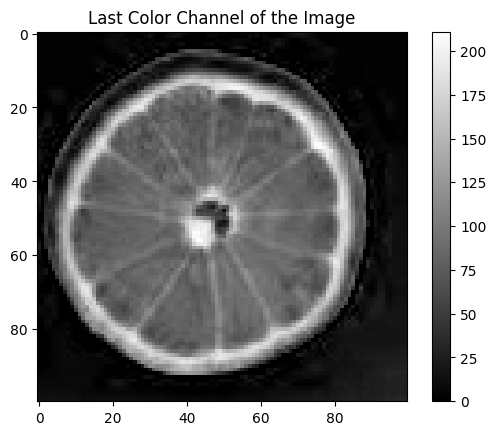

In [ ]:
# Shape of the image
print("Shape of the original image:", image.shape)

# New variable called img_single_channel
img_single_channel = image[:, :, -1]

# Shape of img_single_channel
print("Shape of the single channel image:", img_single_channel.shape)

# Plot img_single_channel
plt.imshow(img_single_channel, cmap='gray')
plt.colorbar()
plt.title('Last Color Channel of the Image')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of the averaged channel image: (100, 100)


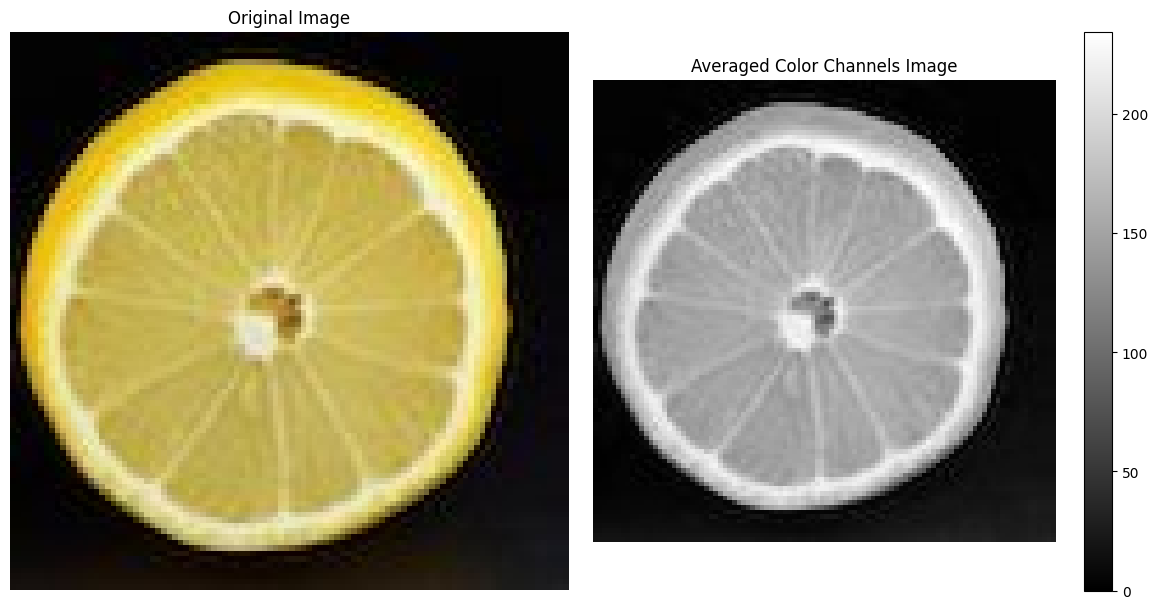

In [ ]:
# New variable called img_average_channel
img_average_channel = np.mean(image, axis=2)

# Shape of img_average_channel
print("Shape of the averaged channel image:", img_average_channel.shape)

# Plot the original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_average_channel, cmap='gray')
plt.colorbar()
plt.title('Averaged Color Channels Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# The original color information and visual appeal of full-color image on the
# left is better.
# the grayscale representation on the right portraits better vidualization to
# check intensity and brightness.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [ ]:
# Identity_matrix that has the same size as img_average_channel
rows, cols = img_average_channel.shape
identity_matrix = np.eye(rows, cols)

# Random row out of identity_matrix
random_row_index = np.random.randint(rows)
print("Random row from identity_matrix:", identity_matrix[random_row_index])

# Note - The printed row will have a single '1' at the position corresponding
# to the row index (because it's from the main diagonal),
# and the rest of the entries in that row will be zeros.

Random row from identity_matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [ ]:
# Numpy array that contains the numbers 0,1,...,N.
N = img_average_channel.shape[0]
indices = np.arange(N)

# Use numpy.random.shuffle to shuffle the indices
np.random.shuffle(indices)
rows = indices

# Print rows and inspect the elements
print("Shuffled row indices:", rows)

Shuffled row indices: [56 79 57 69 97 31 68 91 18 58 72 38 65 98 32 60 70 36 63 74 51 78 93 16
 99 27 55 83 20 19 89  1 84 64 39 66 59 21 90 94 22 44 95 47 96 92 86  0
  6 43 52 87 73 17  8 77  7 62 53 29 49 13 54 37 67 10 35  2  5 81 34 28
 14 11 12 71 26 42 30  3 61 15  9 33 48  4 75 24 45 50 41 88 25 82 23 80
 46 76 40 85]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [ ]:
# A New matrix T from identity_matrix
T = identity_matrix[rows]

# Describe in your own words what matrix T is?
# Matrix T is a shuffled version of the identity matrix. When we multiply
# another matrix by T, it will result in a reordering of the rows of that matrix
# based on this permutation.

# Shape of T
print("Shape of T:", T.shape)

Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Shape of transformed_image: (100, 100)


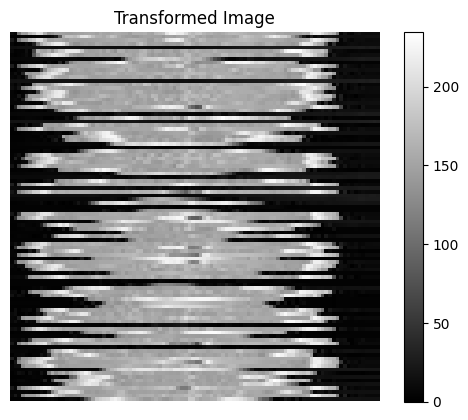

In [ ]:
# Matrix multiply T and img_average_channel
transformed_image = T @ img_average_channel

# Shape of the result
print("Shape of transformed_image:", transformed_image.shape)

# Plot transformed_image
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.colorbar()
plt.axis('off')
plt.show()

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

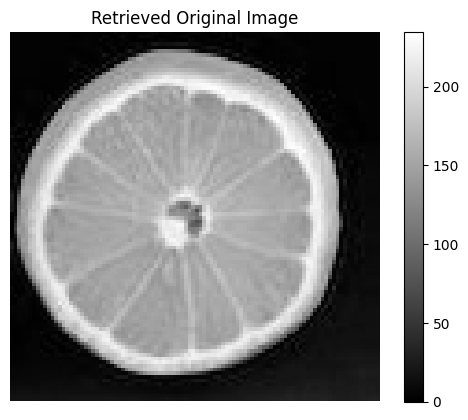

In [ ]:
# Inverse of T
Tinv = np.linalg.inv(T)

# Inverse of the scrambling operation
retrieved_image = Tinv @ transformed_image

# Plot the result
plt.imshow(retrieved_image, cmap='gray')
plt.title('Retrieved Original Image')
plt.colorbar()
plt.axis('off')
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

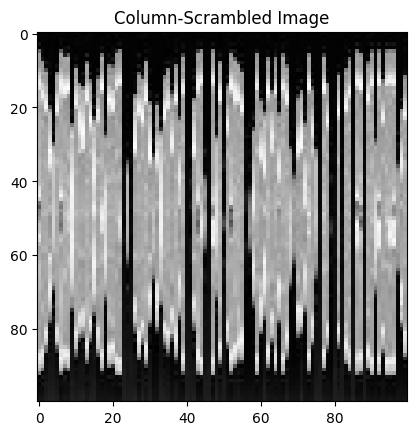

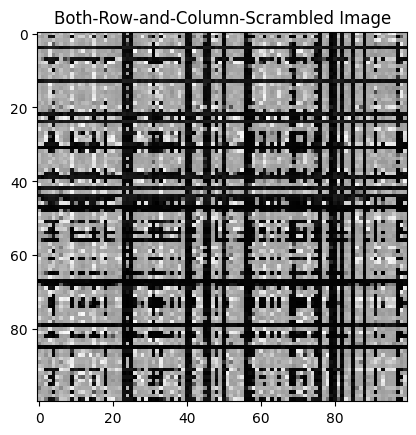

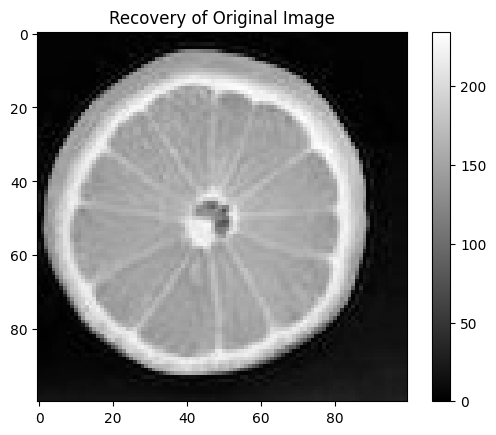

In [ ]:
# Scrambling the columns of the original image using T
transformed_image_columns = img_average_channel @ T

# Plotting the column-scrambled image
plt.imshow(transformed_image_columns, cmap='gray')
plt.title("Column-Scrambled Image")
plt.show()

# Scrambling both the columns and rows of the original image using T
transformed_image_both = T @ img_average_channel @ T

# Plotting the both-row-and-column-scrambled image
plt.imshow(transformed_image_both, cmap='gray')
plt.title("Both-Row-and-Column-Scrambled Image")
plt.show()

# Using Tinv to retrieve the original image from the both-row-and-column-
# scrambled image
retrieved_image_both = Tinv @ transformed_image_both @ Tinv

# Plotting the retrieved image
plt.imshow(retrieved_image_both, cmap='gray')
plt.colorbar()
plt.title("Recovery of Original Image")
plt.show()